In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import f1_score
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [17]:
df=pd.read_csv("/content/Twitter_Data.csv.zip")
tf=pd.read_csv("/content/Reddit_Data.csv.zip")

In [18]:
df.head()

,clean_text,category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0


In [19]:
df.isna().sum()

clean_text    4
category      7
dtype: int64

In [20]:
df=df.dropna(how='any')

In [21]:
tf

,clean_comment,category
0,family mormon have never tried explain them t...,1
1,buddhism has very much lot compatible with chr...,1
2,seriously don say thing first all they won get...,-1
3,what you have learned yours and only yours wha...,0
4,for your own benefit you may want read living ...,1
...,...,...
37244,jesus,0
37245,kya bhai pure saal chutiya banaya modi aur jab...,1
37246,downvote karna tha par upvote hogaya,0
37247,haha nice,1


In [22]:
tf.isna().sum()

clean_comment    100
category           0
dtype: int64

In [23]:
tf=tf.dropna(how='any')

In [24]:
dist=list(df.category)
pp=[0,0,0]
for i in dist:
    if i==-1:
        pp[0]+=1
    elif i==0:
        pp[1]+=1
    else:
        pp[2]+=1
print(pp)

[35509, 55211, 72249]


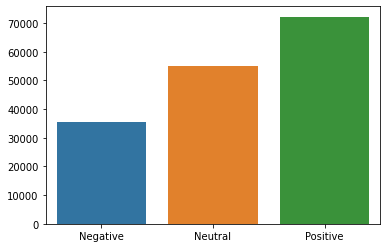

In [25]:
labels=['Negative','Neutral','Positive']
sns.barplot(x=labels,y=pp)
plt.show()

In [26]:
dust=list(tf.category)
aa=[0,0,0]
for i in dust:
    if i==-1:
        aa[0]+=1
    elif i==0:
        aa[1]+=1
    else:
        aa[2]+=1
print(aa)

[8277, 13042, 15830]


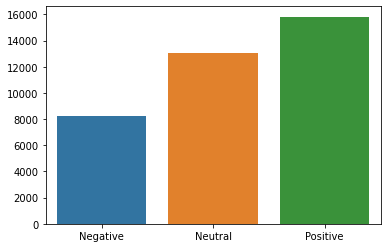

In [27]:
labelss=['Negative','Neutral','Positive']
sns.barplot(x=labels,y=aa)
plt.show()

In [32]:
def cleanText(string):
    punc = '''!()-[]{};:'"\,<>./?@#$%^&*_~'''
    cleanedText = ' '.join(''.join([i for i in string if not i.isdigit()]).split())
    
    for i in punc:
        cleanedText = cleanedText.replace(i, '')
        
    a = [i for i in cleanedText if i.isalpha() or i == ' ']
            
    final_text = ' '.join(''.join(a).split())
    return final_text

In [33]:
tf.rename(columns={'clean_comment':'comment'}, inplace=True)
df.rename(columns={'clean_text':'comment'}, inplace=True)

tf.category = tf.category.apply(lambda x: int(x))
df.category = df.category.apply(lambda x: int(x))

tf.comment = tf.comment.apply(cleanText)
df.comment = df.comment.apply(cleanText)

In [34]:
tf.drop_duplicates(subset='comment', keep=False, inplace=True)
df.drop_duplicates(subset='comment', keep=False, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [35]:
concat_df = pd.concat([df,tf], ignore_index=True)
concat_df.drop_duplicates(subset='comment', keep=False, inplace=True)

In [37]:
counts = [len(tf), len(df), len(concat_df)]
labels = ['Reddit', 'Twitter', 'Total']
colors = ['#ff4500', '#1DA1F2', '#50C878']

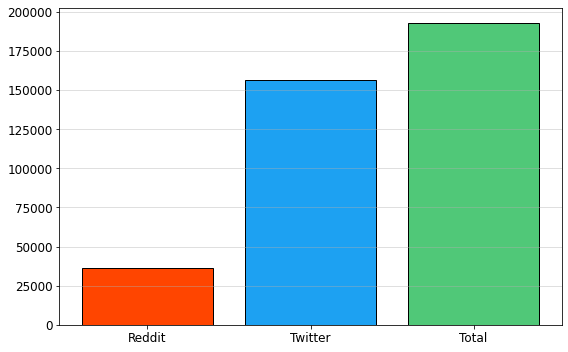

In [38]:
plt.figure(figsize=(8,5))

plt.bar(labels, counts, color=colors, edgecolor='black')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.grid(axis='y', alpha=0.5)
plt.tight_layout()

In [39]:
negative_count = [len(tf[tf.category == -1]),
                 len(df[df.category == -1]),
                 len(concat_df[concat_df.category == -1])]

neutral_count = [len(tf[tf.category == 0]),
                 len(df[df.category == 0]),
                 len(concat_df[concat_df.category == 0])]

positive_count = [len(tf[tf.category == 1]),
                 len(df[df.category == 1]),
                 len(concat_df[concat_df.category == 1])]

x = ['Reddit', 'Twitter', 'Total']
x_indexes = np.arange(len(x))
width = 0.25

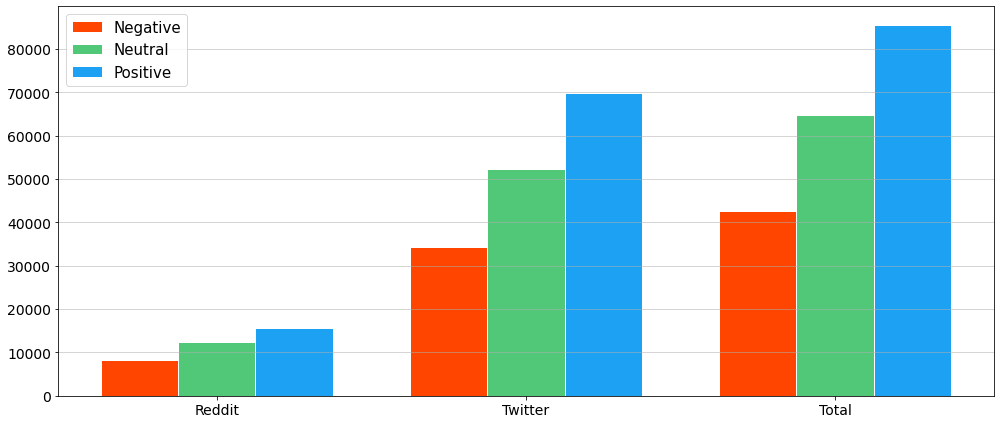

In [40]:
plt.figure(figsize=(14,6))

plt.bar(x_indexes - width, negative_count, width=width, label='Negative', edgecolor='white', color='#ff4500')
plt.bar(x_indexes, neutral_count, width=width, label='Neutral', edgecolor='white', color='#50C878')
plt.bar(x_indexes + width, positive_count, width=width, label='Positive', edgecolor='white', color='#1DA1F2')

plt.yticks(fontsize=14)
plt.xticks(ticks=x_indexes, labels=x, fontsize=14)

plt.legend(prop={'size':15})
plt.grid(axis='y', alpha=0.65)
plt.tight_layout()

In [41]:
negative_avg = int(sum([len(i) for i in concat_df[concat_df.category == -1].comment]) / len(concat_df[concat_df.category == 1]))
neutral_avg = int(sum([len(i) for i in concat_df[concat_df.category == 0].comment]) / len(concat_df[concat_df.category == 0]))
positive_avg = int(sum([len(i) for i in concat_df[concat_df.category == 1].comment]) / len(concat_df[concat_df.category == 1]))

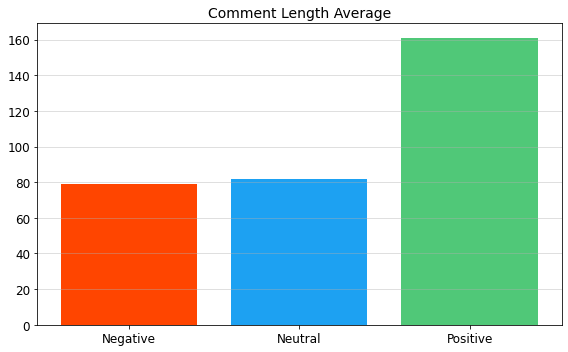

In [42]:
plt.figure(figsize=(8,5))

plt.bar(['Negative', 'Neutral', 'Positive'], [negative_avg, neutral_avg, positive_avg], color=colors)

plt.title('Comment Length Average', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.grid(axis='y', alpha=0.5)
plt.tight_layout()

In [43]:
negative_words = ''
neutral_words = ''
positive_words = ''

stopwords = set(STOPWORDS)

for comment, category in zip(concat_df.comment, concat_df.category):
    tokens = comment.split()
    
    for word in tokens:
        if category == -1:
            negative_words += word + ' '
        elif category == 0:
            neutral_words += word + ' '
        else:
            positive_words += word + ' '

In [54]:
negative_cloud = WordCloud(width = 800, height = 800,
                background_color ='black',
                stopwords = stopwords,
                min_font_size = 10).generate(negative_words)

neutral_cloud = WordCloud(width = 800, height = 800,
                background_color ='black',
                stopwords = stopwords,
                min_font_size = 10).generate(neutral_words)

positive_cloud = WordCloud(width = 800, height = 800,
                background_color ='black',
                stopwords = stopwords,
                min_font_size = 10).generate(positive_words)

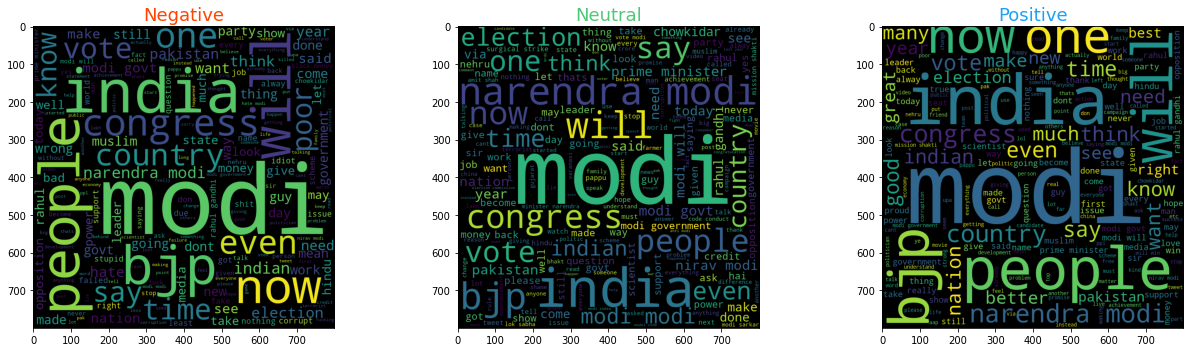

In [55]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(18, 5), facecolor=None)

ax1.imshow(negative_cloud)
ax1.set_title('Negative', fontsize=18, color='#ff4500')


ax2.imshow(neutral_cloud)
ax2.set_title('Neutral', fontsize=18, color='#50C878')

ax3.imshow(positive_cloud)
ax3.set_title('Positive', fontsize=18, color='#1DA1F2')

plt.tight_layout()

In [47]:
class Data:
    def __init__(self, df):
        self.df = df
        
    def fixData(self):
        dataframe = self.df
        lowest_len = min([i for i in dataframe.category.value_counts()])
        
        # Create the final data frame
        final_df = pd.concat([dataframe[dataframe.category == -1][:lowest_len],
                             dataframe[dataframe.category == 0][:lowest_len],
                             dataframe[dataframe.category == 1][:lowest_len]])
        
        # To shuffle the rows in the data frame
        final_df = final_df.sample(frac=1).reset_index(drop=True)
        return final_df

In [48]:
a = Data(concat_df)
fixed_df = a.fixData()
print(f'Before: \n{concat_df.category.value_counts()}\n')
print(f'After: \n{fixed_df.category.value_counts()}')

Before: 
 1    85581
 0    64771
-1    42628
Name: category, dtype: int64

After: 
 0    42628
 1    42628
-1    42628
Name: category, dtype: int64


In [49]:
train_X, test_X, train_y, test_y = train_test_split([i for i in fixed_df.comment], [i for i in fixed_df.category], test_size=0.25, random_state=1)

In [50]:
vectorizer = TfidfVectorizer()
train_X_vectors = vectorizer.fit_transform(train_X)
test_X_vectors = vectorizer.transform(test_X)

In [51]:
clf_svm = LinearSVC()
clf_svm.fit(train_X_vectors, train_y)
clf_prediction = clf_svm.predict(test_X_vectors)

print(f'Accuracy: {clf_svm.score(test_X_vectors, test_y)}')
print(f'Accuracy: {f1_score(test_y, clf_prediction, average=None, labels=[-1, 0, 1])}')

Accuracy: 0.9368177410778518
Accuracy: [0.92436425 0.96171559 0.92404883]


In [52]:
svm_mnb = MultinomialNB()
svm_mnb.fit(train_X_vectors, train_y)
mnb_prediction = svm_mnb.predict(test_X_vectors)

print(f'Accuracy: {svm_mnb.score(test_X_vectors, test_y)}')
print(f'Accuracy: {f1_score(test_y, mnb_prediction, average=None, labels=[-1, 0, 1])}')

Accuracy: 0.7193081229864565
Accuracy: [0.73772154 0.68123926 0.72772719]


In [53]:
svm_dtc = DecisionTreeClassifier()
svm_dtc.fit(train_X_vectors, train_y)
dtc_prediction = svm_dtc.predict(test_X_vectors)

print(f'Accuracy: {svm_dtc.score(test_X_vectors, test_y)}')
print(f'Accuracy: {f1_score(test_y, dtc_prediction, average=None, labels=[-1, 0, 1])}')

Accuracy: 0.8286884989521754
Accuracy: [0.7864571  0.89837957 0.79859296]
